In [1]:
%pip install tweepy

In [2]:
import tweepy
import pandas as pd
# import gspread
import os

In [17]:
# Replace with your actual credentials
consumer_key = "sqR8qG6m6KvI44Hf7gRakFoay"
consumer_secret = "atIY4l4fvEUEZ4h8OCTb2GZSJsF21msDzsZvKGQe77a0YsZWs5"
access_token = "1828835203504283648-uStsJGhP54L4g77Yzt80DisM9TFlkX"
access_token_secret = "EGfVX4x5DydAtufRL9gSdXeEtUHFaxraZGPpzvDrciVnG"
bearer_token = "AAAAAAAAAAAAAAAAAAAAACno5QEAAAAA%2BZLcBoCVS%2Bo282evIEHoGqOsjbY%3DdaCMfJU4218Lydo58XwdOlGt0OAzOH6YZKTrRA3elChgosmZk9"

try:
    # Authenticate with the Twitter API
    auth = tweepy.OAuth1UserHandler(
        consumer_key,
        consumer_secret,
        access_token,
        access_token_secret,
        bearer_token
    )
    api = tweepy.API(auth)

    # Verify credentials (optional but recommended)
    api.verify_credentials()
    print("Authentication successful!")

except tweepy.TweepyException as e:
    print(f"Error during authentication: {e}")
except Exception as e:
    print(f"An unexpected error occurred: {e}")

Authentication successful!


In [20]:
# Initialize Twitter API Client
client = tweepy.Client(bearer_token)

# Query topik KCIC / Whoosh (Bahasa Indonesia, exclude retweet)
search_query = (
    '(#Whoosh OR #KCIC OR #KeretaCepat OR "Whoosh" OR "KCIC" OR "kereta cepat") '
    'lang:id -is:retweet'
)

In [21]:
try:
    response = client.search_recent_tweets(
        query=search_query,
        max_results=100,
        tweet_fields=["created_at", "author_id", "public_metrics"]
    )

    tweets = response.data

    if tweets:
        print(f"Found {len(tweets)} tweets:")
        for tweet in tweets:
            print(f"- {tweet.text[:80]}...")
    else:
        print("Found 0 tweets.")

except tweepy.TweepyException as e:
    print(f"Error during tweet search: {e}")
except Exception as e:
    print(f"Unexpected error: {e}")

Found 100 tweets:
- Melihat Stasiun Shenzhenbei (Shenzhen North) buat naik kereta cepat pulang dari ...
- Melihat Stasiun Shenzhenbei (Shenzhen North) buat naik kereta cepat pulang dari ...
- @RikeSants Nyesek banget buat dijadiin bahan pembelajaran negara2 di asia.
"Kalo...
- KCIC II - 19. Menggoda Pegawai Gudang
https://t.co/NmvLTSY8mf

Ideku untuk mengg...
- Makin Banyak yang Naik KA Parahyangan Meski Sudah Ada Kereta Cepat https://t.co/...
- Mantan Menteri Koordinator Bidang Politik, Hukum, dan Keamanan (Menko Polhukam) ...
- Mantan Menteri Koordinator Bidang Politik, Hukum, dan Keamanan (Menko Polhukam) ...
- @RikeSants NGAWUR. 
Jepang iri, negara2 lain di Asia Tenggara pilih China, setel...
- Baca artikel ini dan share pendapat kalian di kolom komentar!
https://t.co/vJvSb...
- Kereta cepat apa Jalan di pelosok negeri https://t.co/oV9FaTMGkZ...
- - KPK Selidiki Pembebasan Lahan Proyek Kereta Cepat Whoosh
baca selengkapnya di ...
- @iwanfals Buat bayar bunga whoosh aja...
- @Dedynu

In [26]:
data = []
for tweet in tweets:
    data.append({
        "date": tweet.created_at,
        "author_id": tweet.author_id,
        "text": tweet.text,
        "likes": tweet.public_metrics["like_count"],
        "retweets": tweet.public_metrics["retweet_count"],
        "replies": tweet.public_metrics["reply_count"]
    })

df = pd.DataFrame(data)
df

,date,author_id,text,likes,retweets,replies
0,2025-11-17 11:12:57+00:00,169445636,Melihat Stasiun Shenzhenbei (Shenzhen North) b...,11,2,1
1,2025-11-17 11:08:28+00:00,169445636,Melihat Stasiun Shenzhenbei (Shenzhen North) b...,7,0,1
2,2025-11-17 11:06:16+00:00,1129372831744053249,@RikeSants Nyesek banget buat dijadiin bahan p...,0,0,0
3,2025-11-17 11:02:00+00:00,1471835353019387904,KCIC II - 19. Menggoda Pegawai Gudang\nhttps:/...,1,0,0
4,2025-11-17 11:00:47+00:00,135795460,Makin Banyak yang Naik KA Parahyangan Meski Su...,0,0,0
...,...,...,...,...,...,...
95,2025-11-17 04:16:15+00:00,1591803103333883904,@DedynurPalakka Ini logika yang SESAT\nBangun ...,0,0,0
96,2025-11-17 04:08:58+00:00,987590093346091008,"@vaniepink Bagus tuh , nanti makin banyak KCIC...",0,0,0
97,2025-11-17 04:08:14+00:00,1112580604682342400,"@telyufess Gocar mau ngambil kok nder, aku uda...",0,0,0
98,2025-11-17 04:03:29+00:00,267097201,@hbbhbtllh @KAI121 @soupgalantine Buat bayar u...,0,0,0


In [32]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch.nn.functional as F

# gunakan GPU kalau ada
device = "cuda" if torch.cuda.is_available() else "cpu"

model_name = "cardiffnlp/twitter-xlm-roberta-base-sentiment"

tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSequenceClassification.from_pretrained(model_name).to(device)
model.eval()

label_map = {0: "negative", 1: "neutral", 2: "positive"}

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/841 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/1.11G [00:00<?, ?B/s]

In [33]:
def detect_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "neutral", 0.0

    enc = tokenizer(
        text,
        truncation=True,
        padding=True,
        max_length=128,
        return_tensors="pt"
    ).to(device)

    with torch.no_grad():
        output = model(**enc).logits

    prob = F.softmax(output, dim=1)[0].cpu().numpy()
    sentiment_id = prob.argmax()
    return label_map[sentiment_id], float(prob[sentiment_id])

In [34]:
from tqdm.auto import tqdm

sentiments = []
conf_scores = []

for txt in tqdm(df["text"], desc="Sentiment Analysis"):
    senti, score = detect_sentiment(txt)
    sentiments.append(senti)
    conf_scores.append(score)

df["sentiment"] = sentiments
df["confidence"] = conf_scores

Sentiment Analysis:   0%|          | 0/100 [00:00<?, ?it/s]

In [35]:
df.head()

,date,author_id,text,likes,retweets,replies,clean_text,sentiment,confidence
0,2025-11-17 11:12:57+00:00,169445636,Melihat Stasiun Shenzhenbei (Shenzhen North) b...,11,2,1,melihat stasiun shenzhenbei shenzhen north bua...,positive,0.511032
1,2025-11-17 11:08:28+00:00,169445636,Melihat Stasiun Shenzhenbei (Shenzhen North) b...,7,0,1,melihat stasiun shenzhenbei shenzhen north bua...,positive,0.473245
2,2025-11-17 11:06:16+00:00,1129372831744053249,@RikeSants Nyesek banget buat dijadiin bahan p...,0,0,0,nyesek banget buat dijadiin bahan pembelajaran...,negative,0.925946
3,2025-11-17 11:02:00+00:00,1471835353019387904,KCIC II - 19. Menggoda Pegawai Gudang\nhttps:/...,1,0,0,kcic menggoda pegawai gudang ideku menggoda pe...,positive,0.731551
4,2025-11-17 11:00:47+00:00,135795460,Makin Banyak yang Naik KA Parahyangan Meski Su...,0,0,0,makin banyak naik parahyangan meski kereta cepat,neutral,0.706378


In [36]:
df["sentiment"].value_counts()

,count
sentiment,
negative,42
neutral,40
positive,18


In [37]:
df_sorted = df.sort_values("date").reset_index(drop=True)
df_sorted.head()

,date,author_id,text,likes,retweets,replies,clean_text,sentiment,confidence
0,2025-11-17 04:02:12+00:00,1884976589039190016,"Ada yang kecewa nih kayaknya \n\n ""Soal Utang ...",10,2,2,kecewa nih kayaknya soal utang whoosh purbaya ...,negative,0.833414
1,2025-11-17 04:03:29+00:00,267097201,@hbbhbtllh @KAI121 @soupgalantine Buat bayar u...,0,0,0,buat bayar utang whoosh sama ngasih bonus akhi...,neutral,0.518789
2,2025-11-17 04:08:14+00:00,1112580604682342400,"@telyufess Gocar mau ngambil kok nder, aku uda...",0,0,0,gocar mau ngambil kok nder aku udah sering bol...,positive,0.579419
3,2025-11-17 04:08:58+00:00,987590093346091008,"@vaniepink Bagus tuh , nanti makin banyak KCIC...",0,0,0,bagus tuh makin banyak kcic ikn,positive,0.732230
4,2025-11-17 04:16:15+00:00,1591803103333883904,@DedynurPalakka Ini logika yang SESAT\nBangun ...,0,0,0,logika sesat bangun ikn katanya investor overs...,negative,0.859898


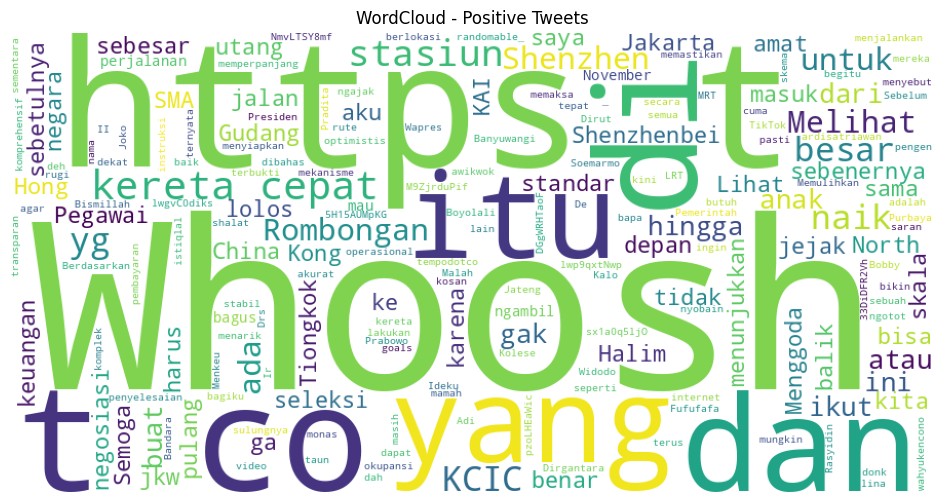

In [38]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text_pos = " ".join(df[df["sentiment"]=="positive"]["text"])

wc = WordCloud(width=900, height=450, background_color="white").generate(text_pos)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud - Positive Tweets")
plt.show()

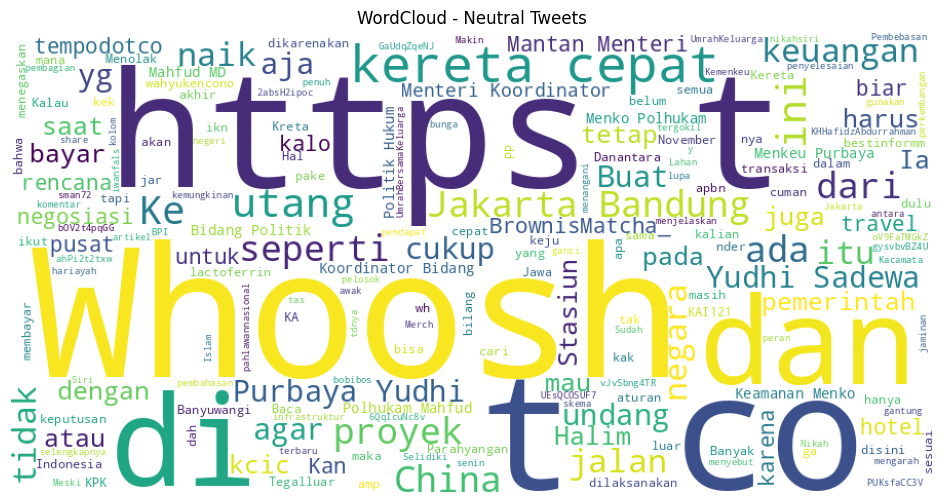

In [39]:
text_neu = " ".join(df[df["sentiment"]=="neutral"]["text"])

wc = WordCloud(width=900, height=450, background_color="white").generate(text_neu)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud - Neutral Tweets")
plt.show()

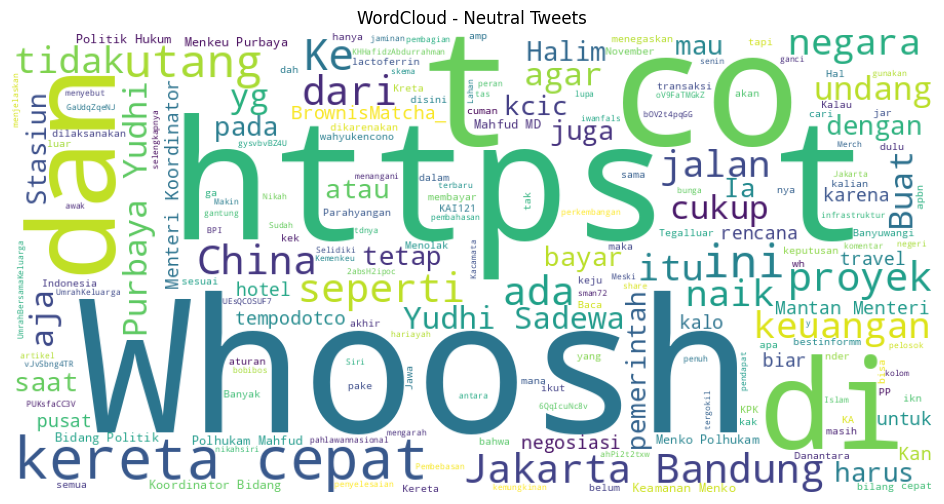

In [40]:
text_neu = " ".join(df[df["sentiment"]=="neutral"]["text"])

wc = WordCloud(width=900, height=450, background_color="white").generate(text_neu)
plt.figure(figsize=(12,6))
plt.imshow(wc)
plt.axis("off")
plt.title("WordCloud - Neutral Tweets")
plt.show()

In [41]:
df.to_csv("tweets_with_sentiment.txt", sep="\t", index=False)
from google.colab import files
files.download("tweets_with_sentiment.txt")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>